#### Smart Vacation Planner
- The story is simple: You tell the agent where you want to go. 
- It checks if the destination is "adventure" or "relaxation" 
- It then routes you to a specific expert node to give you a tailored recommendation.

In [4]:
from typing import TypedDict, List

class AgentState(TypedDict):
    user_input: str
    category: str
    recommendation: str

In [5]:
def categorizer_node(state: AgentState):
    print("---CATEGORIZING---")
    user_msg = state["user_input"].lower()
    # Simple logic to simulate an LLM decision
    if "surf" in user_msg or "hike" in user_msg:
        category = "adventure"
    else:
        category = "relaxation"
    return {"category": category}

def adventure_expert(state: AgentState):
    print("---ADVENTURE NODE---")
    return {"recommendation": "You should go Paragliding in Interlaken, Switzerland!"}

def relaxation_expert(state: AgentState):
    print("---RELAXATION NODE---")
    return {"recommendation": "You should visit the Blue Lagoon in Iceland."}

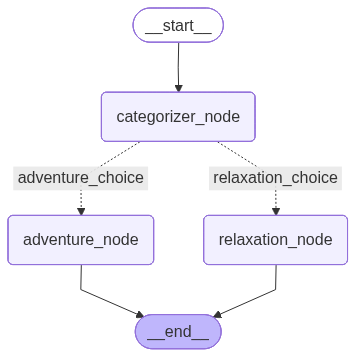

In [6]:
from langgraph.graph import StateGraph, END

# Initialize the Graph
workflow = StateGraph(AgentState)

# Add Nodes
workflow.add_node("categorizer_node", categorizer_node)
workflow.add_node("adventure_node", adventure_expert)
workflow.add_node("relaxation_node", relaxation_expert)

# Set Entry Point
workflow.set_entry_point("categorizer_node")

# Logic for routing
def route_decision(state: AgentState):
    if state["category"] == "adventure":
        return "adventure_choice"
    return "relaxation_choice"

# Add Conditional Edges
workflow.add_conditional_edges(
    "categorizer_node",
    route_decision,
    {
        "adventure_choice": "adventure_node",
        "relaxation_choice": "relaxation_node"
    }
)

# Connect experts to the END
workflow.add_edge("adventure_node", END)
workflow.add_edge("relaxation_node", END)

# Compile
app = workflow.compile()
app

In [7]:
# inputs = {"user_input": "I want a quiet place to read and swim"}

inputs = {"user_input": "I want to hike in an interesting place"}

result = app.invoke(inputs)

print(f"\nResult: {result['recommendation']}")

---CATEGORIZING---
---ADVENTURE NODE---

Result: You should go Paragliding in Interlaken, Switzerland!
